# Taller 4

In [106]:
#!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
#import init; init.init(force_download=False); 
from IPython.display import Image

In [107]:
#Image("../../docs/udea-datascience.png")

**Desarrollado por:** Javier Fernando Botía Valderrama

*Docente del Departamento de Ingeniería de Sistemas*

**Materia:** Estadística y Análisis Exploratorio

**Departamento:** Especialización en Analítica y Ciencia de Datos - Posgrados en Ingeniería

**Facultad de Ingeniería - Universidad de Antioquia**

*   **Nombres Completos**: Johan Arbey Vargas Mejía
*   **Número de Cédula**: 1152195956


*   **Nombres Completos**: María del mar Ipia Guzmán
*   **Número de Cédula**: 1214726595

## Descripción de la base de datos C 🔥

**Name:** Superconductivty Data

**Website:** https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data

**Description:** 

There are two files: (1) train.csv contains 81 features extracted from 21263 superconductors along with the critical temperature in the 82nd column, (2) unique_m.csv contains the chemical formula broken up for all the 21263 superconductors from the train.csv file. The last two columns have the critical temperature and chemical formula. The original data comes from [Web Link] which is public. The goal here is to predict the critical temperature based on the features extracted.

**The one picked for this analysis was train.csv**


**Output variable:**
1. critical_temp

In [108]:
superc_url = 'https://raw.githubusercontent.com/analiticaycienciadatosudea/EstadisticaExploracionDatos/main/superconductivity.csv'

## Librerias

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import OLSInfluence

from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import SparsePCA
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RANSACRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.feature_selection import r_regression
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import mutual_info_regression 
from sklearn.utils.validation import column_or_1d


%matplotlib inline
plt.style.use('ggplot')

In [110]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [111]:
tabla = pd.read_csv(superc_url)

In [112]:
tabla.shape

(21263, 82)

## Exploración de Datos

En este apartado, se debe cargar la base de datos y generar una exploración de datos, determinando si hay datos faltantes o no y generando un reporte de las estadísticas principales como la media, la desviación estándar, los cuartiles y los valores máximos y mínimos de cada variable. Luego, se debe realizar una detección de datos atípicos con un algoritmo o método de su elección y además, analizar si es pertinente o no cambiar la escala de las características o variables.

In [113]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21263 entries, 0 to 21262
Data columns (total 82 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   number_of_elements               21263 non-null  int64  
 1   mean_atomic_mass                 21263 non-null  float64
 2   wtd_mean_atomic_mass             21263 non-null  float64
 3   gmean_atomic_mass                21263 non-null  float64
 4   wtd_gmean_atomic_mass            21263 non-null  float64
 5   entropy_atomic_mass              21263 non-null  float64
 6   wtd_entropy_atomic_mass          21263 non-null  float64
 7   range_atomic_mass                21263 non-null  float64
 8   wtd_range_atomic_mass            21263 non-null  float64
 9   std_atomic_mass                  21263 non-null  float64
 10  wtd_std_atomic_mass              21263 non-null  float64
 11  mean_fie                         21263 non-null  float64
 12  wtd_mean_fie      

### Valores nulos

In [114]:
def find_missing(tabla: pd.DataFrame, 
                 missing: str = None, 
                 nan_value: bool = False) -> pd.DataFrame:
    """Calcula el número y porcentaje de valores faltantes o NaN 
     en un DataFrame.

    Args:
        tabla (pd.DataFrame): DataFrame a analizar.
        missing (str, optional): Valor que se considera faltante. 
         Por defecto es None.
        nan_value (bool, optional): Si se deben buscar NaN. 
         Por defecto es False.

    Returns:
        pd.DataFrame: DataFrame que contiene el número y porcentaje 
        de valores faltantes o NaN por columna.

    """
    lista = []
    if missing:
        for col in tabla.columns:
            num = tabla[tabla[col] == missing].shape[0]
            lista.append(num)
            
    if nan_value:
        for col in tabla.columns:
            num = tabla[tabla[col].isnull()].shape[0]
            lista.append(num)     
    
    dic = {
        'Columnas': tabla.columns,
        'Faltantes': lista}
    df_faltantes = pd.DataFrame(dic)
    
    df_faltantes['Porcentaje'] = df_faltantes['Faltantes'] / tabla.shape[0]
    
    return df_faltantes

In [115]:
df_faltantes = find_missing(tabla, nan_value=True)

In [116]:
cond = df_faltantes['Faltantes'] != 0
df_faltantes[cond]

,Columnas,Faltantes,Porcentaje


In [117]:
tabla.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,mean_fie,wtd_mean_fie,gmean_fie,wtd_gmean_fie,entropy_fie,wtd_entropy_fie,range_fie,wtd_range_fie,std_fie,wtd_std_fie,mean_atomic_radius,wtd_mean_atomic_radius,gmean_atomic_radius,wtd_gmean_atomic_radius,entropy_atomic_radius,wtd_entropy_atomic_radius,range_atomic_radius,wtd_range_atomic_radius,std_atomic_radius,wtd_std_atomic_radius,mean_Density,wtd_mean_Density,gmean_Density,wtd_gmean_Density,entropy_Density,wtd_entropy_Density,range_Density,wtd_range_Density,std_Density,wtd_std_Density,mean_ElectronAffinity,wtd_mean_ElectronAffinity,gmean_ElectronAffinity,wtd_gmean_ElectronAffinity,entropy_ElectronAffinity,wtd_entropy_ElectronAffinity,range_ElectronAffinity,wtd_range_ElectronAffinity,std_ElectronAffinity,wtd_std_ElectronAffinity,mean_FusionHeat,wtd_mean_FusionHeat,gmean_FusionHeat,wtd_gmean_FusionHeat,entropy_FusionHeat,wtd_entropy_FusionHeat,range_FusionHeat,wtd_range_FusionHeat,std_FusionHeat,wtd_std_FusionHeat,mean_ThermalConductivity,wtd_mean_ThermalConductivity,gmean_ThermalConductivity,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,std_ThermalConductivity,wtd_std_ThermalConductivity,mean_Valence,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,41.448045,769.614748,870.442317,737.474751,832.769649,1.299172,0.926726,572.222612,483.517264,215.631279,224.050033,157.983101,134.720039,144.448738,120.989330,1.267756,1.131138,139.325025,51.369885,51.601267,52.340465,6111.465214,5267.188547,3460.692235,3117.241110,1.072425,0.856037,8665.438818,2902.736814,3416.910784,3319.170628,76.879751,92.717486,54.359502,72.416225,1.070250,0.770757,120.730514,59.332637,48.912207,44.409356,14.296113,13.848001,10.136977,10.141161,1.093343,0.914065,21.138994,8.218528,8.323333,7.717576,89.706911,81.549080,29.841727,27.308061,0.727630,0.539991,250.893443,62.033066,98.943993,96.234051,3.198228,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,19.983544,87.488694,143.278200,78.327275,119.772520,0.381935,0.334018,309.614442,224.042874,109.966774,127.927104,20.147288,28.801567,22.090958,35.837843,0.375411,0.407159,67.272228,35.019356,22.898396,25.294524,2846.785185,3221.314506,3703.256370,3975.122587,0.342356,0.319761,4097.126831,2398.471020,1673.624915,1611.799629,27.701890,32.276387,29.007425,31.648444,0.343391,0.285986,58.700327,28.620

### Caractetísticas numéricas

In [118]:
tabla_n = tabla.select_dtypes(include=[np.number])

In [119]:
df_features = tabla_n[tabla_n.columns[:-1]]
target = tabla_n[tabla_n.columns[-1]]

In [120]:
df_features.shape

(21263, 81)

In [121]:
cols_binarias = []
for col in df_features.columns:
    if df_features[col].nunique() == 2:
        cols_binarias.append(col)

In [122]:
cols_binarias

[]

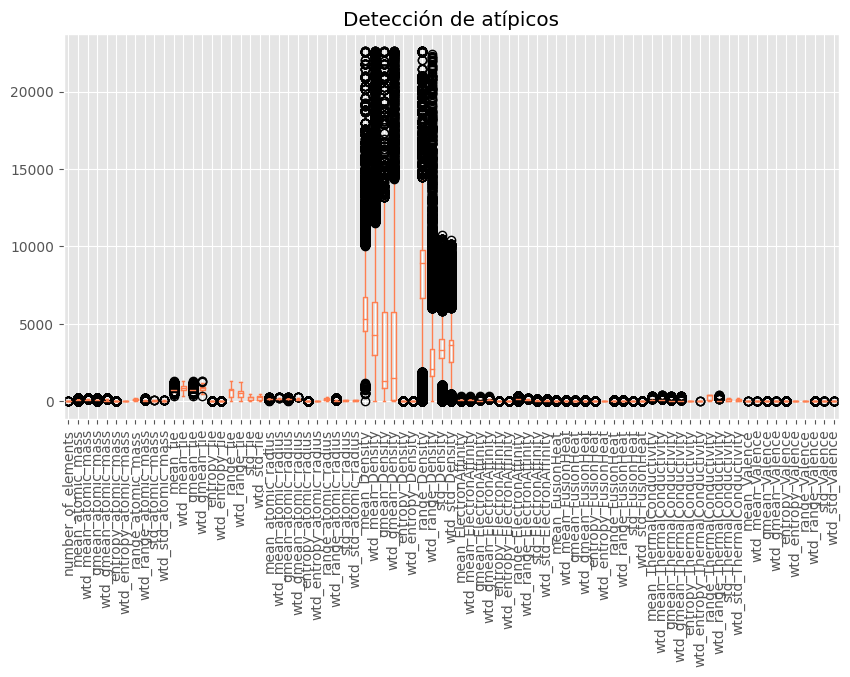

In [123]:
df_features.plot(kind='box', figsize=(10, 5), rot=90, color='coral')
plt.title('Detección de atípicos')
plt.show()

In [124]:
min_max = MinMaxScaler()
df_scale = min_max.fit_transform(df_features)

df_numeric_scale = pd.DataFrame(df_scale, columns=df_features.columns)

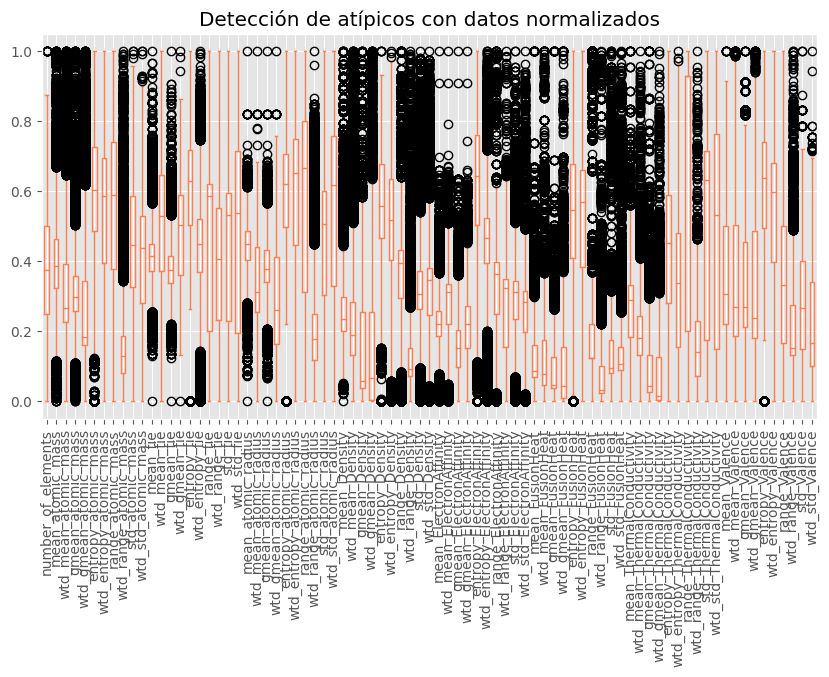

In [125]:
df_numeric_scale.plot(
    kind='box', 
    figsize=(10, 5), 
    rot=90, 
    color='coral')

plt.title('Detección de atípicos con datos normalizados')
plt.show()

### LOF

In [126]:
lof = LocalOutlierFactor(
    n_neighbors=5, 
    algorithm='auto', 
    contamination='auto',
    metric='euclidean') 

filtrado = lof.fit_predict(df_numeric_scale) 

ground_truth = np.ones(len(df_numeric_scale), dtype=int) 

n_errors = (filtrado != ground_truth).sum()

n_errors

4334

In [127]:
#Eliminación de datos atípicos
pos = np.where(filtrado == ground_truth)
pos = np.hstack(pos)

df = df_numeric_scale.loc[pos, :]

print("Número de muestras sin outilers:", df.shape[0])

Número de muestras sin outilers: 16929


In [128]:
target = target[df.index]

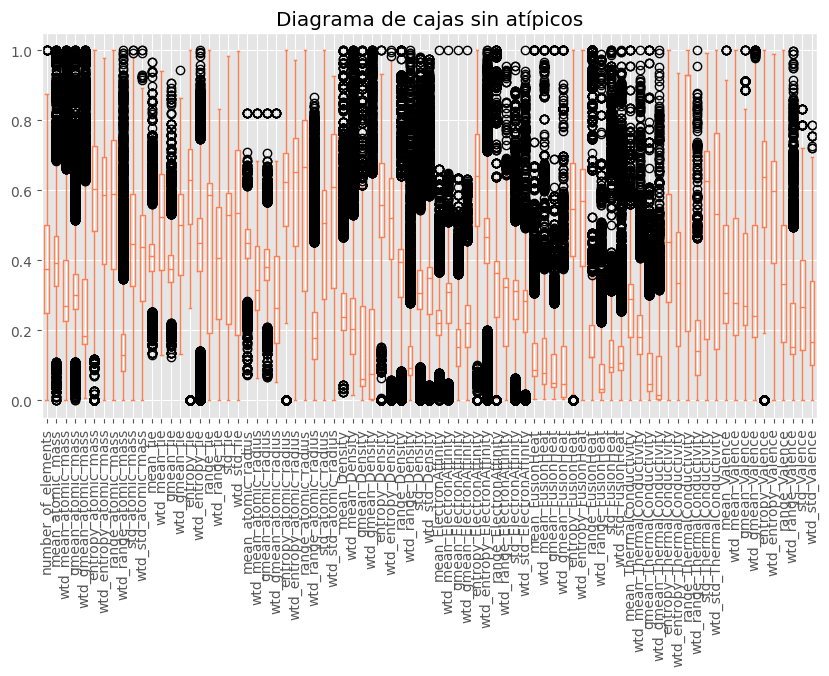

In [129]:
df.plot(kind='box', figsize=(10, 5), rot=90, color='coral')
plt.title('Diagrama de cajas sin atípicos')
plt.show()

### Test Z

In [130]:
def get_outliers(col: str, df: pd.DataFrame, a: float = 3.0) -> pd.Series:
    """Devuelve una Serie booleana indicando si los valores en la columna `col` 
     del DataFrame `df` son valores atípicos (outliers) utilizando el método 
     del rango intercuartílico (IQR) multiplicado por un factor `a`.
    
    Args:
        col: Nombre de la columna que se quiere analizar.
        df: DataFrame que contiene la columna `col`.
        a: Factor de multiplicación del rango intercuartílico (por defecto es 3.0).
        
    Returns:
        pd.Series: Serie booleana que indica si cada valor de la columna `col` es un valor atípico.
    
    """
    m_ = df[col].mean()
    s_ = df[col].std()
    
    up_lim = m_ + a * s_
    low_lim = m_ - a * s_
    
    outs = ((df[col] < low_lim) | (df[col] > up_lim))
    
    return outs

In [131]:
data_z = df_numeric_scale.copy()

In [132]:
for col in df_numeric_scale.columns:
    
    outs = get_outliers(col, data_z)
    out_count = sum(outs)
    
    print(f'{col} : {out_count}')
    
    if out_count > 0:
        data_z = data_z[outs == False]
        
print(data_z.shape)

number_of_elements : 14
mean_atomic_mass : 324
wtd_mean_atomic_mass : 376
gmean_atomic_mass : 310
wtd_gmean_atomic_mass : 202
entropy_atomic_mass : 220
wtd_entropy_atomic_mass : 21
range_atomic_mass : 0
wtd_range_atomic_mass : 313
std_atomic_mass : 0
wtd_std_atomic_mass : 0
mean_fie : 500
wtd_mean_fie : 0
gmean_fie : 215
wtd_gmean_fie : 0
entropy_fie : 0
wtd_entropy_fie : 46
range_fie : 0
wtd_range_fie : 0
std_fie : 0
wtd_std_fie : 0
mean_atomic_radius : 130
wtd_mean_atomic_radius : 0
gmean_atomic_radius : 127
wtd_gmean_atomic_radius : 0
entropy_atomic_radius : 0
wtd_entropy_atomic_radius : 51
range_atomic_radius : 0
wtd_range_atomic_radius : 486
std_atomic_radius : 7
wtd_std_atomic_radius : 0
mean_Density : 344
wtd_mean_Density : 163
gmean_Density : 42
wtd_gmean_Density : 27
entropy_Density : 119
wtd_entropy_Density : 153
range_Density : 368
wtd_range_Density : 306
std_Density : 192
wtd_std_Density : 37
mean_ElectronAffinity : 312
wtd_mean_ElectronAffinity : 31
gmean_ElectronAffinity 

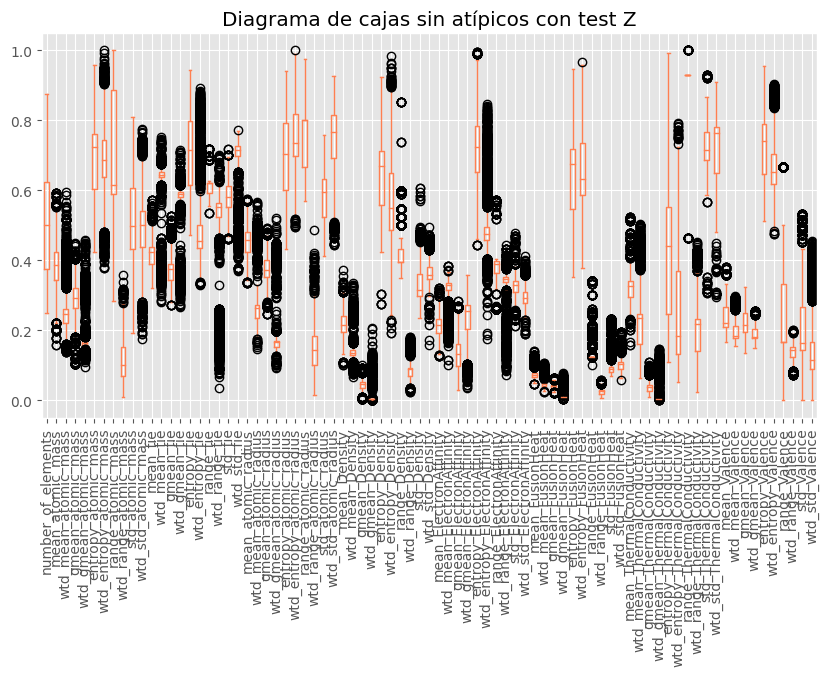

In [133]:
data_z.plot(kind='box', figsize=(10, 5), rot=90, color='coral')
plt.title('Diagrama de cajas sin atípicos con test Z')
plt.show()

In [134]:
data_z.shape

(9053, 81)

## Reducción de dimensionalidad
Una vez realizado la exploración de datos del item anterior, se procede a transformar los datos originales en datos reducidos o embebidos a partir de los algoritmo de reducción de dimensionalidad. Se sugiere utilizar mínimo tres métodos de reducción de dimensionalidad para seleccionar los datos reducidos con el error cuadrático medio más bajo.

### PCA

In [135]:
num_componentes = df.shape[1]

pca = PCA(
    iterated_power='auto', 
    n_components=num_componentes, 
    random_state=17, 
    svd_solver='auto', 
    tol=1e-3, 
    whiten=False)

In [136]:
principal_componentes = pca.fit_transform(df)

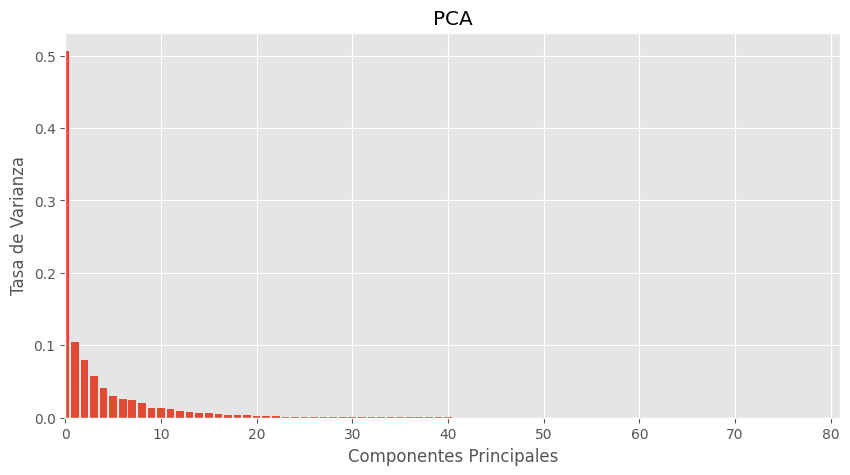

In [137]:
varianza = pca.explained_variance_ratio_ 

fig = plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(varianza)), varianza)
plt.xlabel('Componentes Principales')
plt.ylabel('Tasa de Varianza')
plt.title('PCA')
plt.xlim(0, len(varianza))
plt.show()

In [138]:
importancia = pd.DataFrame(varianza)
importancia = importancia.T

lista_pca = []
for i in range(len(varianza)):
    impor = importancia.loc[:, 0: i].sum(axis=1).values * 100
    print(f'Porcentaje de Varianza detectada para las primeras {i + 1} componentes: {impor[0]}')
    lista_pca.append(impor[0])

Porcentaje de Varianza detectada para las primeras 1 componentes: 50.6379670558067
Porcentaje de Varianza detectada para las primeras 2 componentes: 61.08382653818647
Porcentaje de Varianza detectada para las primeras 3 componentes: 69.01426587074913
Porcentaje de Varianza detectada para las primeras 4 componentes: 74.81420331260031
Porcentaje de Varianza detectada para las primeras 5 componentes: 78.97307492019274
Porcentaje de Varianza detectada para las primeras 6 componentes: 81.98297228337071
Porcentaje de Varianza detectada para las primeras 7 componentes: 84.56670587628143
Porcentaje de Varianza detectada para las primeras 8 componentes: 87.0137910828157
Porcentaje de Varianza detectada para las primeras 9 componentes: 88.97827925332955
Porcentaje de Varianza detectada para las primeras 10 componentes: 90.33434737842668
Porcentaje de Varianza detectada para las primeras 11 componentes: 91.672322315433
Porcentaje de Varianza detectada para las primeras 12 componentes: 92.82507328

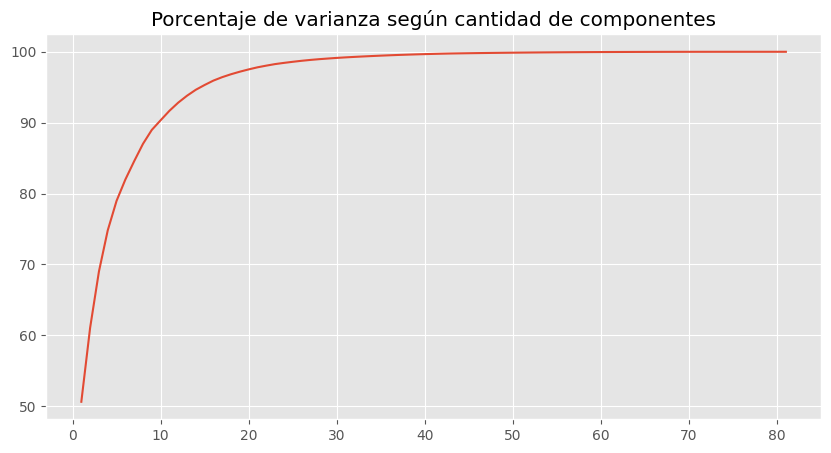

In [139]:
pd.Series(lista_pca, index=range(1, len(lista_pca)+1)).plot(figsize=(10, 5))

plt.title('Porcentaje de varianza según cantidad de componentes')
plt.show()

In [140]:
componentes_seleccionadas = 14

tasa_varianza = np.sum(varianza[0: componentes_seleccionadas])

Nuevas_Componentes = PCA(
    tasa_varianza, 
    random_state = 17, 
    svd_solver='auto', 
    tol = 1e-3, 
    whiten = False)

df_pca = Nuevas_Componentes.fit_transform(df) 

print('Tamaño de los datos originales con MinMax: ', df.shape) 
print('Tamaño de los datos reducidos: ', df_pca.shape)

Tamaño de los datos originales con MinMax:  (16929, 81)
Tamaño de los datos reducidos:  (16929, 15)


In [141]:
componentes = [f'Componente_{i}' for i in range(1, componentes_seleccionadas + 2)]

In [142]:
componentes

['Componente_1',
 'Componente_2',
 'Componente_3',
 'Componente_4',
 'Componente_5',
 'Componente_6',
 'Componente_7',
 'Componente_8',
 'Componente_9',
 'Componente_10',
 'Componente_11',
 'Componente_12',
 'Componente_13',
 'Componente_14',
 'Componente_15']

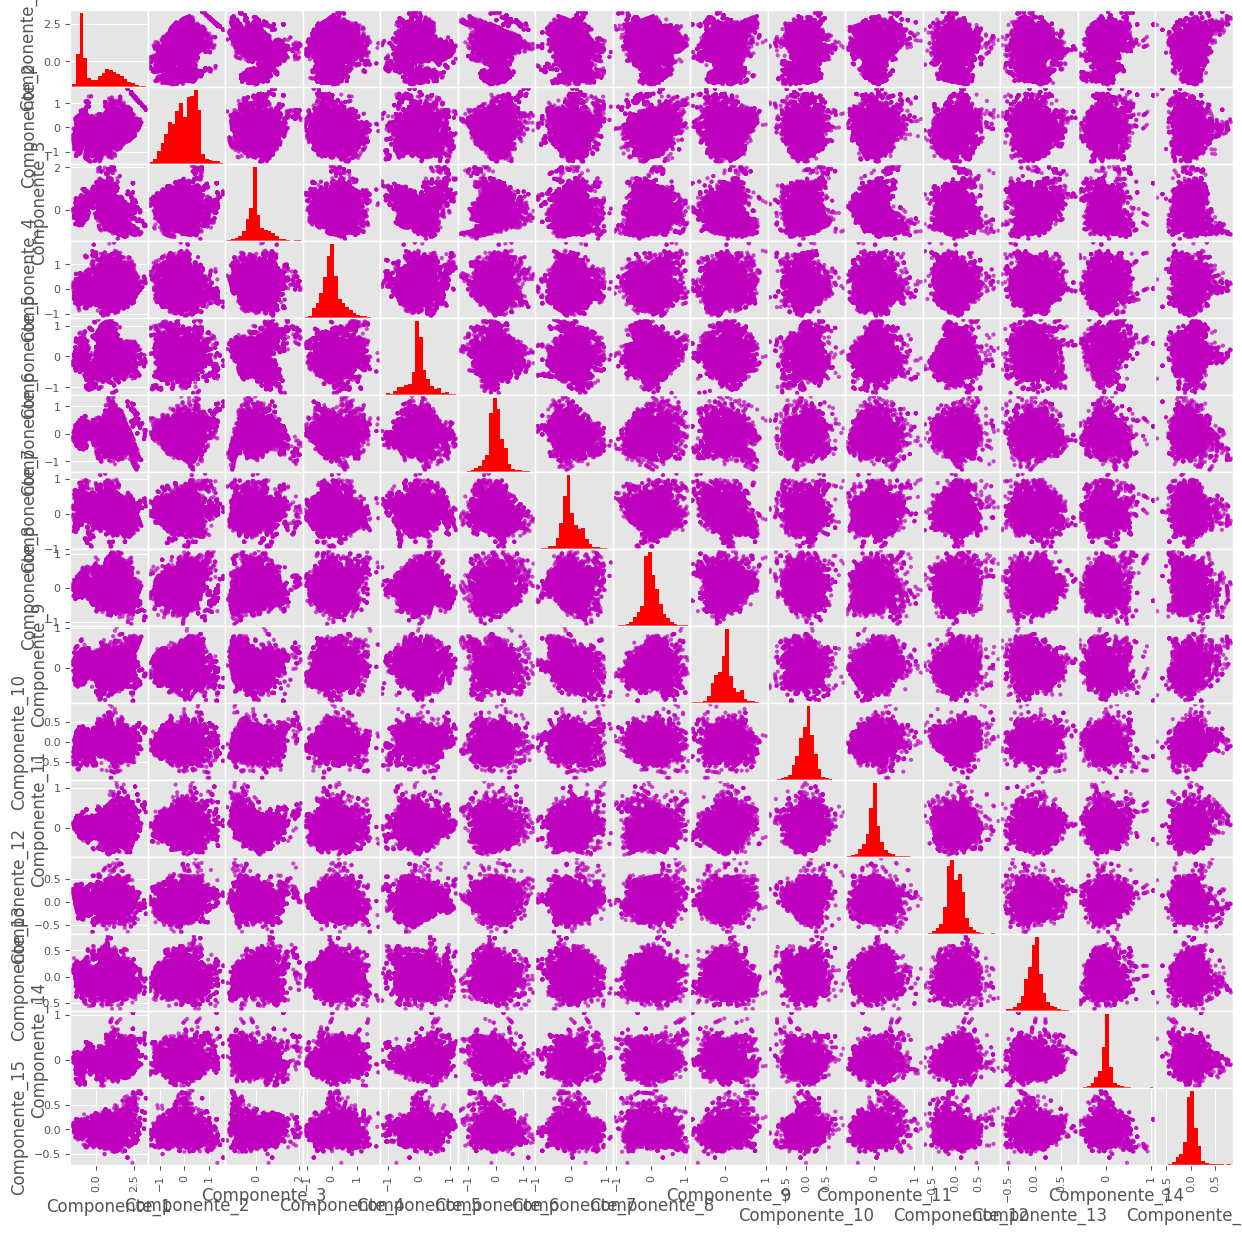

In [143]:
df_pca = pd.DataFrame(df_pca, columns=componentes)
pd.plotting.scatter_matrix(df_pca, 
                           alpha=0.7, 
                           figsize=(15,15),
                           color = 'm', 
                           hist_kwds = {'bins':20, 'color':'red'})
plt.show()

In [144]:
df_pca.head(3)

,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6,Componente_7,Componente_8,Componente_9,Componente_10,Componente_11,Componente_12,Componente_13,Componente_14,Componente_15
0,-0.776835,0.635232,-0.000371,0.212502,-0.064934,-0.003595,-0.053630,-0.052830,0.040516,0.045444,-0.051925,0.048146,-0.098169,-0.012349,0.038145
1,-0.970652,0.328015,-0.134993,0.019868,0.050474,-0.166889,-0.134192,0.147084,-0.048402,-0.040252,0.031023,0.069117,-0.240212,0.034557,0.021066
2,-0.742451,0.660443,0.002805,0.232192,-0.059658,-0.012212,-0.063559,-0.018162,0.072935,0.034895,-0.069642,0.058497,-0.113255,-0.015039,0.030980


### Kernel PCA

In [145]:
df_kernel = df[: 5000]

In [146]:
df_kernel.shape

(5000, 81)

In [147]:
kpca = KernelPCA(
    n_components=25, 
    kernel='rbf', 
    fit_inverse_transform=True, 
    gamma=0.1)

In [148]:
variables_principales_kernel = kpca.fit_transform(df_kernel)

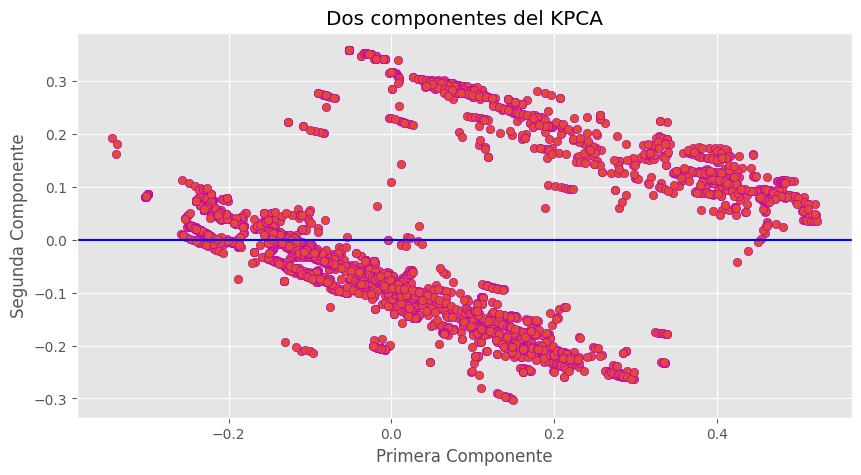

In [149]:
fig = plt.figure(figsize=(10,5)) 

plt.scatter(
    variables_principales_kernel[:,0], 
    variables_principales_kernel[:,1], 
    edgecolors='m')

plt.axhline(0, color='b') 
plt.title('Dos componentes del KPCA')
plt.xlabel('Primera Componente')
plt.ylabel('Segunda Componente')
plt.show()

Valores propios del método kernel:  [184.18832621  94.34333224  61.85602611  40.92951877  29.5463487
  21.01449668  18.09097363  14.77418629  13.01752774  10.18131158
   8.25146293   7.23409547   5.1687655    3.80426944   2.71068913
   2.66702494   2.09866125   1.98294706   1.71160993   1.62049137
   1.35854349   1.21618529   1.1652985    1.06959197   1.0167575 ]


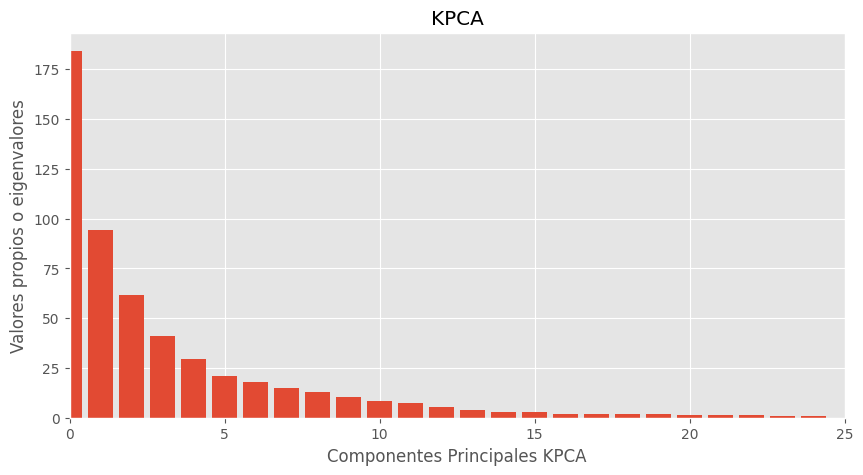

In [150]:
lambdas_kpca = kpca.eigenvalues_ 
print("Valores propios del método kernel: ", lambdas_kpca)

fig = plt.figure(figsize=(10, 5))
plt.bar(np.arange(len(lambdas_kpca)), lambdas_kpca)
plt.xlabel('Componentes Principales KPCA')
plt.ylabel('Valores propios o eigenvalores')
plt.title('KPCA')
plt.xlim(0, len(lambdas_kpca))
plt.show()

In [151]:
componentes = 15
kpca_main = KernelPCA(n_components=componentes, 
                      kernel='linear', 
                      fit_inverse_transform=True, 
                      gamma=0.1)
datos_kernel = kpca_main.fit_transform(df_kernel)
print('Tamaño de los datos originales con MinMax: ', df_kernel.shape)
print('Tamaño de los datos reducidos con Kernel PCA: ', datos_kernel.shape)

Tamaño de los datos originales con MinMax:  (5000, 81)
Tamaño de los datos reducidos con Kernel PCA:  (5000, 15)


In [152]:
componentes = [f'componente_{i}' for i in range(1, componentes + 1)]

In [153]:
datos_kernel = pd.DataFrame(datos_kernel, columns=componentes)

In [154]:
datos_kernel.head()

,componente_1,componente_2,componente_3,componente_4,componente_5,componente_6,componente_7,componente_8,componente_9,componente_10,componente_11,componente_12,componente_13,componente_14,componente_15
0,0.562733,-0.021591,0.099150,-0.183457,-0.040182,-0.016211,0.026148,-0.120639,0.069833,0.017066,-0.008047,0.021090,0.013695,0.071747,-0.023009
1,0.189150,0.156364,-0.051896,0.003385,-0.072969,-0.020949,0.164973,-0.250642,0.045091,-0.081301,0.120980,-0.102701,0.045154,0.273552,0.039299
2,0.593080,-0.039737,0.127784,-0.179385,-0.053513,-0.000429,0.040852,-0.149261,0.091466,0.004191,0.034302,-0.007293,0.025405,0.071995,-0.028629
3,0.576768,-0.030057,0.112583,-0.181515,-0.046573,-0.008777,0.033155,-0.134303,0.080065,0.011125,0.011849,0.007779,0.019153,0.071918,-0.025745
4,0.539557,-0.007264,0.076048,-0.186966,-0.028586,-0.029124,0.013652,-0.096104,0.051894,0.026757,-0.042370,0.043906,0.004535,0.071200,-0.017883


### Sparse PCA

In [155]:
spca = SparsePCA(n_components=num_componentes, 
                 alpha=0.1, 
                 ridge_alpha=0.01, 
                 random_state=17, 
                 max_iter=1000, 
                 tol=1e-3)

In [156]:
variables_principales_sparse = spca.fit_transform(df_kernel)

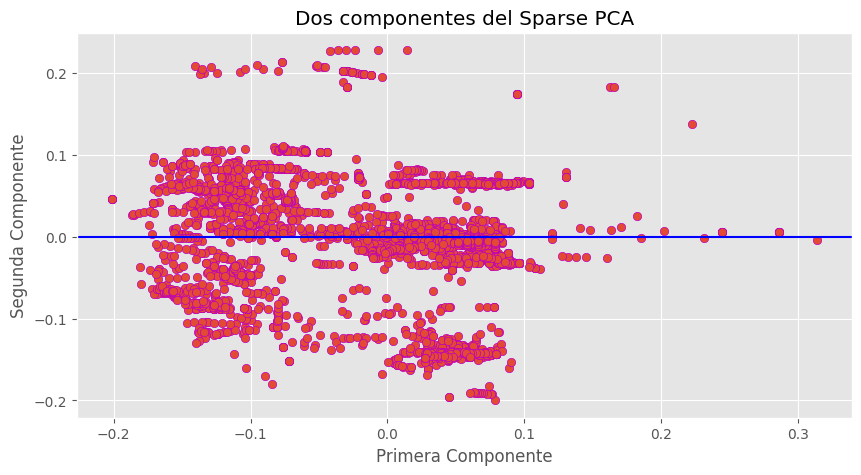

In [157]:
fig = plt.figure(figsize=(10,5))

plt.scatter(
    variables_principales_sparse[:,0], 
    variables_principales_sparse[:,1], 
    edgecolors="m")

plt.axhline(0, color="blue") 
plt.title('Dos componentes del Sparse PCA') 
plt.xlabel('Primera Componente') 
plt.ylabel('Segunda Componente') 
plt.show()

In [158]:
promedio = np.mean(spca.components_ == 0)
print('Valor promedio de esparcimiento con todas las componentes = {:.3f}'.format(promedio))

Valor promedio de esparcimiento con todas las componentes = 0.972


In [159]:
lista = []
for i in range(1, df_kernel.shape[1] + 1):
    spca_2 = SparsePCA(
        n_components=i, 
        alpha=0.5, 
        ridge_alpha=0.05, 
        random_state=17, 
        max_iter=1000, 
        tol=1e-3)
    Datos_SPCA_2 = spca_2.fit_transform(df_kernel)
    promedio_2 = np.mean(spca_2.components_ == 0)
    lista.append(promedio_2)

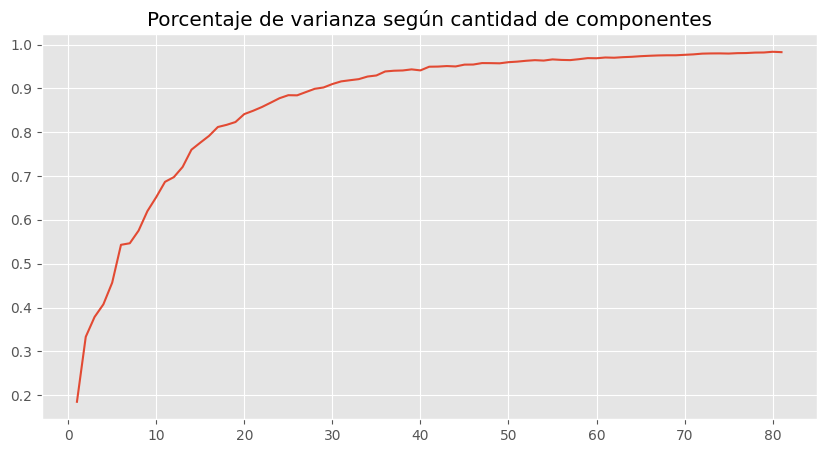

In [160]:
pd.Series(lista, index=range(1, 82)).plot(figsize=(10, 5))

plt.title('Porcentaje de varianza según cantidad de componentes')
plt.show()

In [161]:
spca_2 = SparsePCA(n_components=40, 
                   alpha=0.5, 
                   ridge_alpha=0.05, 
                   random_state=17, 
                   max_iter=1000, 
                   tol=1e-3)
Datos_SPCA_2 = spca_2.fit_transform(df_kernel)

In [162]:
promedio_2 = np.mean(spca_2.components_ == 0)

In [163]:
print('Tamaño de los datos originales con MinMax: ', df_kernel.shape) # Tamaño de los datos originales
print('Tamaño de los datos reducidos con Sparse PCA: ', Datos_SPCA_2.shape)

Tamaño de los datos originales con MinMax:  (5000, 81)
Tamaño de los datos reducidos con Sparse PCA:  (5000, 40)


## Modelos de regresión
En este apartado se debe crear los tres modelos de regresión vistos en clase y realizar los entrenamientos y comparaciones correspondientes

### Regresión lineal

In [164]:
# definición de features y target
x = df.values
y = target.values

In [165]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.2, 
    train_size=0.8, 
    random_state=17)

print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (13543, 81)
Tamaño de los Datos de Validación =  (3386, 81)
Tamaño del Vector de Clases de Entrenamiento =  (13543,)
Tamaño del Vector de Clases de Prueba =  (3386,)


In [166]:
lr = LinearRegression()

In [167]:
lr.fit(x_train, y_train)

LinearRegression()

In [168]:
importancia = lr.coef_

importancia = pd.DataFrame(
    importancia,
    index=df.columns, columns=['Puntaje'])

importancia_ordenada = importancia.sort_values(by=['Puntaje'])

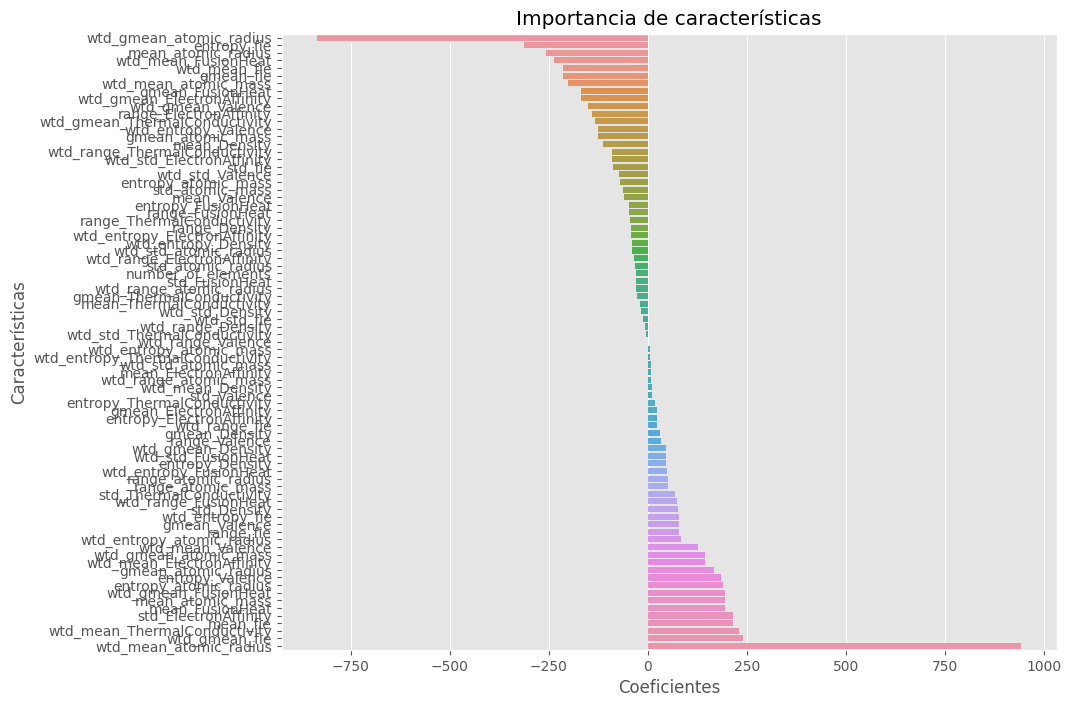

In [169]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

fig = plt.figure(figsize=(10, 8))

sns.barplot(y=importancia_ordenada.index, x=imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.title('Importancia de características')
plt.show()

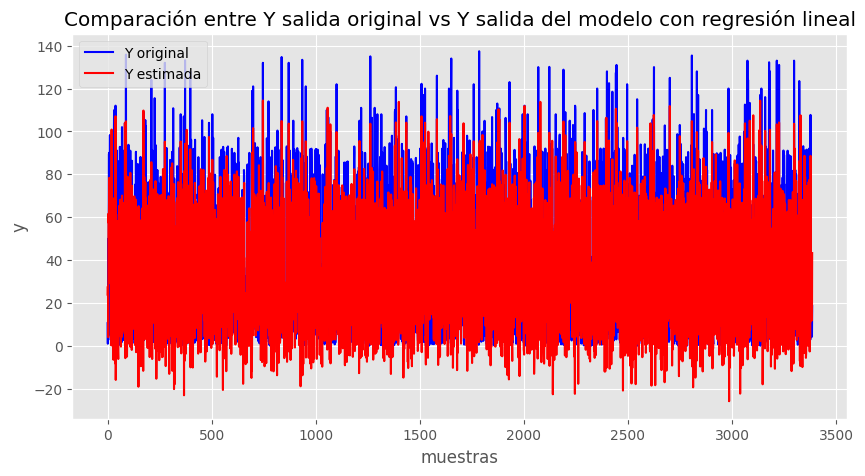

In [170]:
y_hat = lr.predict(x_test) 

fig = plt.figure(figsize=(10, 5))
line_1 = plt.plot(
    np.arange(len(y_test)), 
    y_test, 
    color='b', 
    label='Y original') 

line_2 = plt.plot(
    np.arange(len(y_test)), 
    y_hat, 
    color='r', 
    label='Y estimada')

plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal')
plt.xlabel('muestras')
plt.ylabel('y')
plt.show()

In [171]:
validacion_r2 = cross_val_score(
    lr, 
    x_test, 
    y_test, 
    cv = 5, 
    scoring = 'r2')

puntaje = np.array([validacion_r2.mean(), validacion_r2.std()]) # Se calcula la media y desviación estándar de la validación
                                                            # cruzada con coeficiente de determinación
print("Media o R2 promedio = {:.4f}".format(puntaje[0]))
print("Desviación Estándar de R2 = {:.4f}".format(puntaje[1]))

Media o R2 promedio = 0.7560
Desviación Estándar de R2 = 0.0078


In [172]:
r2 = r2_score(y_test, y_hat)
mse = mean_squared_error(y_test, y_hat)

print("R2 score:", r2)
print("Mean squared error:", mse)

R2 score: 0.760376160699435
Mean squared error: 279.5297932856578


### Regresión lineal con reducción de dimensionalidad

In [173]:
df_pca.shape

(16929, 15)

In [174]:
x_r = df_pca.values

In [175]:
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(
    x_r, 
    y,
    test_size=0.2, 
    train_size=0.8, 
    random_state=17)

print("Tamaño de los Datos de Entrenamiento = ", x_train_r.shape)
print("Tamaño de los Datos de Validación = ", x_test_r.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train_r.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test_r.shape)

Tamaño de los Datos de Entrenamiento =  (13543, 15)
Tamaño de los Datos de Validación =  (3386, 15)
Tamaño del Vector de Clases de Entrenamiento =  (13543,)
Tamaño del Vector de Clases de Prueba =  (3386,)


In [176]:
lr_r = LinearRegression()

lr_r.fit(x_train_r, y_train_r)

importancia = lr_r.coef_

importancia = pd.DataFrame(
    importancia,
    index=df_pca.columns, 
    columns=['Puntaje'])

importancia_ordenada = importancia.sort_values(by=['Puntaje'])

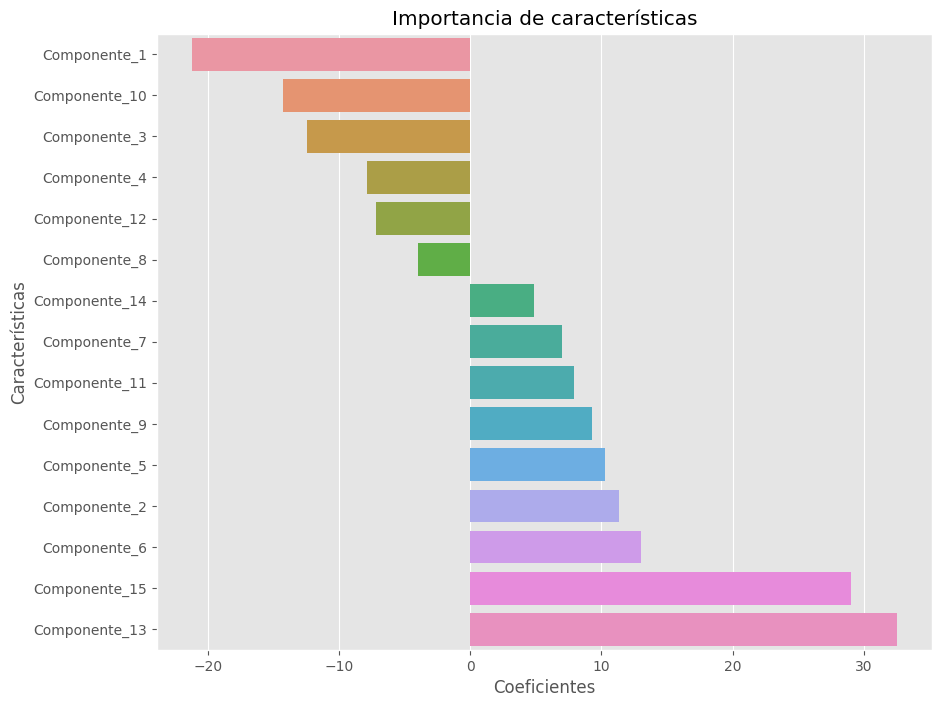

In [177]:
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

fig = plt.figure(figsize=(10, 8))

sns.barplot(y=importancia_ordenada.index, x=imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.title('Importancia de características')
plt.show()

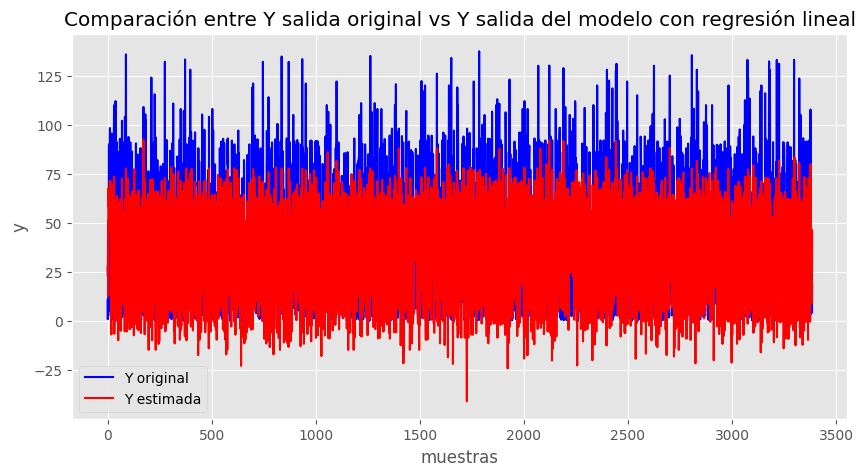

In [178]:
y_hat_r = lr_r.predict(x_test_r) 

fig = plt.figure(figsize=(10, 5))
line_1 = plt.plot(
    np.arange(len(y_test_r)), 
    y_test_r, 
    color='b', 
    label='Y original') 

line_2 = plt.plot(
    np.arange(len(y_test_r)), 
    y_hat_r, 
    color='r', 
    label='Y estimada')

plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal')
plt.xlabel('muestras')
plt.ylabel('y')
plt.show()

In [179]:
validacion_r2 = cross_val_score(
    lr_r, 
    x_test_r, 
    y_test_r, 
    cv = 5, 
    scoring = 'r2')

puntaje = np.array([validacion_r2.mean(), validacion_r2.std()]) 

print("Media o R2 promedio = {:.4f}".format(puntaje[0]))
print("Desviación Estándar de R2 = {:.4f}".format(puntaje[1]))

Media o R2 promedio = 0.6341
Desviación Estándar de R2 = 0.0132


### Regresión por pasos

In [180]:
R_Pearson = r_regression(x, y)
tabla = pd.DataFrame(R_Pearson, index=df.columns, columns=['Valor R'])

In [181]:
len(tabla[tabla['Valor R'] >= 0.05])

44

In [182]:
tabla

,Valor R
number_of_elements,0.606220
mean_atomic_mass,-0.137629
wtd_mean_atomic_mass,-0.332513
gmean_atomic_mass,-0.253040
wtd_gmean_atomic_mass,-0.388355
...,...
wtd_entropy_Valence,0.594257
range_Valence,-0.135312
wtd_range_Valence,-0.444779
std_Valence,-0.199038


In [183]:
seleccion = SelectKBest(r_regression, k=44)
X_select = seleccion.fit_transform(df, target)
seleccion.get_feature_names_out()

array(['number_of_elements', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass',
       'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'wtd_gmean_fie',
       'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie',
       'std_fie', 'wtd_std_fie', 'mean_atomic_radius',
       'entropy_atomic_radius', 'wtd_entropy_atomic_radius',
       'range_atomic_radius', 'std_atomic_radius',
       'wtd_std_atomic_radius', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'std_Density', 'wtd_std_Density',
       'wtd_mean_ElectronAffinity', 'entropy_ElectronAffinity',
       'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity',
       'wtd_range_ElectronAffinity', 'std_ElectronAffinity',
       'wtd_std_ElectronAffinity', 'entropy_FusionHeat',
       'wtd_entropy_FusionHeat', 'mean_ThermalConductivity',
       'wtd_mean_ThermalConductivity', 'entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_Ther

In [184]:
Modelo_LR_select_features = LinearRegression()
Modelo_LR_select_features.fit(X_select,y)

LinearRegression()

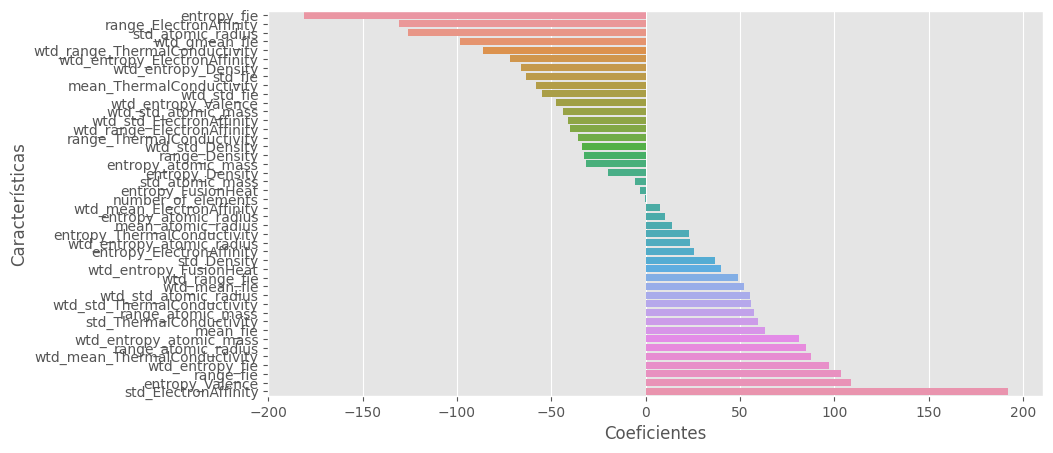

In [185]:
Caracteristicas_Seleccionadas = seleccion.get_feature_names_out()
importancia = Modelo_LR_select_features.coef_ # Importancia de las características
importancia = pd.DataFrame(importancia, 
                           index = Caracteristicas_Seleccionadas, columns = ['Puntaje'])
importancia_ordenada = importancia.sort_values(by = ['Puntaje'])
imp = importancia_ordenada.values
imp = np.squeeze(np.asarray(imp))

fig = plt.figure(figsize=(10, 5))
sns.barplot(y = importancia_ordenada.index, x = imp.T)
plt.xlabel("Coeficientes")
plt.ylabel("Características")
plt.show()

In [186]:
X_Norm_Test = pd.DataFrame(x_test, columns = df.columns)
X_Norm_Test_Seleccionados = X_Norm_Test[seleccion.get_feature_names_out()]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


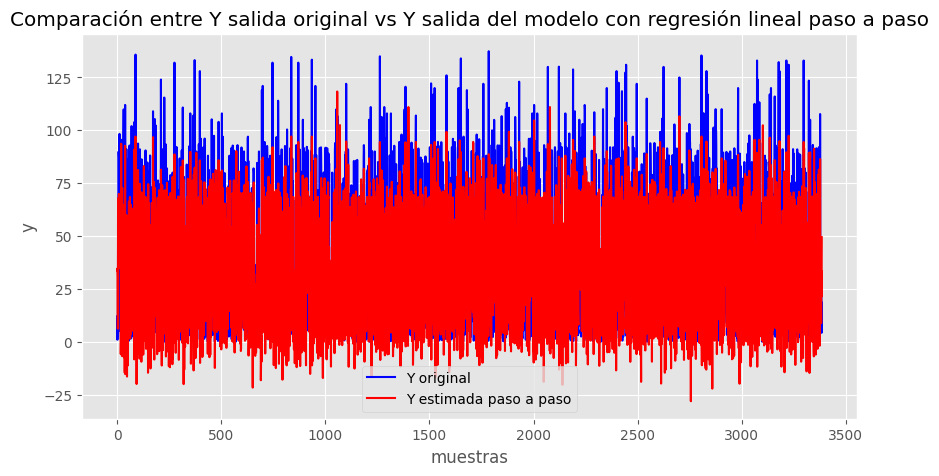

In [187]:
Y_predi = Modelo_LR_select_features.predict(X_Norm_Test_Seleccionados)

fig = plt.figure(figsize=(10, 5))
line_1 = plt.plot(
    np.arange(len(y_test)),
    y_test, 
    color = 'b', 
    label='Y original') 

line_2 = plt.plot(
    np.arange(len(y_test)), 
    Y_predi, 
    color = 'r',
    label='Y estimada paso a paso')

plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal paso a paso') 
plt.xlabel('muestras') # Etiqueta del eje x
plt.ylabel('y') # Etiqueta del eje y
plt.show() # Mostrar gráfica

In [188]:
Puntaje_1 = Modelo_LR_select_features.score(X_Norm_Test_Seleccionados.values, y_test) 
Validacion = cross_val_score(
    Modelo_LR_select_features,
    X_Norm_Test_Seleccionados,
    y_test, 
    cv = 5, 
    scoring = 'neg_mean_squared_error')

Puntaje_2 = np.array([Validacion.mean(), Validacion.std()]) #
print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = 0.7316
Media = -319.1512
Desviación Estándar = 17.462623245801527


### Regresión lineal con características polinómicas

In [201]:
df_poli = df[:5000]
y_poli = target[:5000]

In [222]:
MI = mutual_info_regression(
    df, 
    target, 
    discrete_features = 'auto', 
    n_neighbors = 3)

mi_ = pd.DataFrame(MI, index = df.columns, columns = ['Valor MI'])

In [224]:
len(mi_[mi_['Valor MI'] >= 0.5])

79

In [227]:
Seleccion_MI = SelectKBest(mutual_info_regression, k = 30)
X_select_MI = Seleccion_MI.fit_transform(df, target)
Seleccion_MI.get_feature_names_out()

array(['gmean_atomic_mass', 'entropy_atomic_mass', 'range_atomic_mass',
       'entropy_fie', 'range_fie', 'std_fie', 'wtd_gmean_atomic_radius',
       'entropy_atomic_radius', 'range_atomic_radius',
       'std_atomic_radius', 'gmean_Density', 'wtd_gmean_Density',
       'entropy_Density', 'range_Density', 'mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'entropy_ElectronAffinity',
       'range_ElectronAffinity', 'std_ElectronAffinity',
       'mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'std_ThermalConductivity',
       'wtd_std_ThermalConductivity', 'wtd_mean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence'], dtype=object)

In [228]:
x = df[Seleccion_MI.get_feature_names_out()].values
y = target.values

In [229]:
x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y,
    test_size=0.2, 
    train_size=0.8, 
    random_state=17)

print("Tamaño de los Datos de Entrenamiento = ", x_train.shape)
print("Tamaño de los Datos de Validación = ", x_test.shape)
print("Tamaño del Vector de Clases de Entrenamiento = ", y_train.shape)
print("Tamaño del Vector de Clases de Prueba = ", y_test.shape)

Tamaño de los Datos de Entrenamiento =  (13543, 30)
Tamaño de los Datos de Validación =  (3386, 30)
Tamaño del Vector de Clases de Entrenamiento =  (13543,)
Tamaño del Vector de Clases de Prueba =  (3386,)


In [230]:
modelo_polinomico = PolynomialFeatures(degree=3, interaction_only=True)                                                                       

X_poly_entrenamiento = modelo_polinomico.fit_transform(x_train)
X_poly_prueba = modelo_polinomico.fit_transform(x_test)

In [231]:
lr_poli = LinearRegression()
lr_poli.fit(X_poly_entrenamiento, y_train)

LinearRegression()

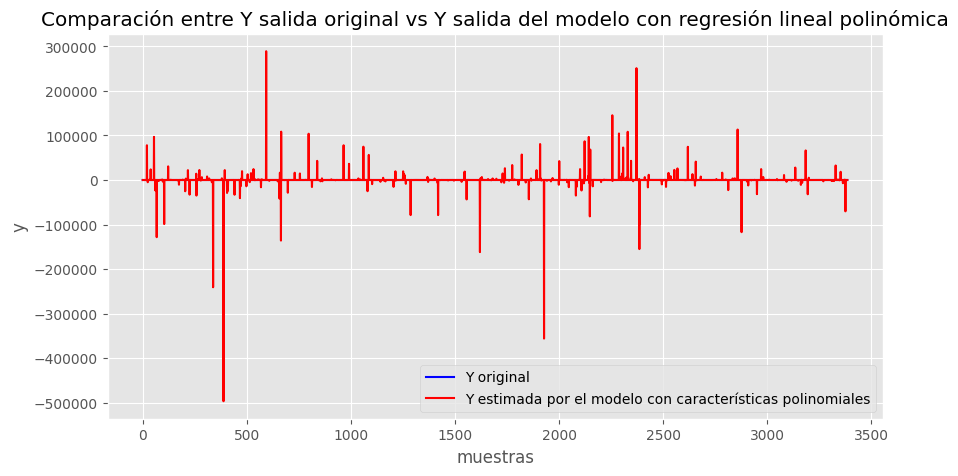

In [232]:
y_hat = lr_poli.predict(X_poly_prueba)

fig = plt.figure(figsize=(10, 5))

line_1 = plt.plot(
    np.arange(len(y_test)),
    y_test, 
    color = 'b', 
    label='Y original') 

line_2 = plt.plot(
    np.arange(len(y_test)),
    y_hat, 
    color = 'r', 
    label='Y estimada por el modelo con características polinomiales') 

plt.legend()
plt.title('Comparación entre Y salida original vs Y salida del modelo con regresión lineal polinómica')
plt.xlabel('muestras')
plt.ylabel('y') 
plt.show() 

In [233]:
Puntaje_1 = lr_poli.score(X_poly_prueba, y_test)
Validacion = cross_val_score(
    lr_poli, X_poly_prueba, y_test, cv = 5, scoring = 'neg_mean_squared_error')

Puntaje_2 = np.array([Validacion.mean(), Validacion.std()])

print("Puntaje = {:.4f}".format(Puntaje_1))
print("Media = {:.4f}".format(Puntaje_2[0]))
print("Desviación Estándar = {:.15f}".format(Puntaje_2[1]))

Puntaje = -234168.5452
Media = -12933805833475676176384.0000
Desviación Estándar = 11107206550338419032064.000000000000000


## Conclusiones
¿Cuál es el modelo de regresión que mejor se adecúa al conjunto de datos? ¿Por qué?

**Colocar las conclusiones de la práctica**

El conjunto de datos de Superconductividad es una recopilación de características físicas y químicas de varios compuestos superconductores, junto con sus temperaturas críticas correspondientes de superconductividad. 

Este conjunto de datos se utiliza para predecir la temperatura crítica de superconductividad de nuevos compuestos, utilizando sus características químicas y físicas. El conjunto de datos contiene información de $21263$ compuestos superconductores y $81$ características diferentes para cada compuesto. Estas características incluyen la composición química, el tamaño y la forma de los átomos, la temperatura y la presión a las que se midieron las propiedades físicas, entre otros factores.

Inicialmente, se realiza el trabajo de análisis exploratorio, buscando valores faltantes pero no se encontró ninguno.

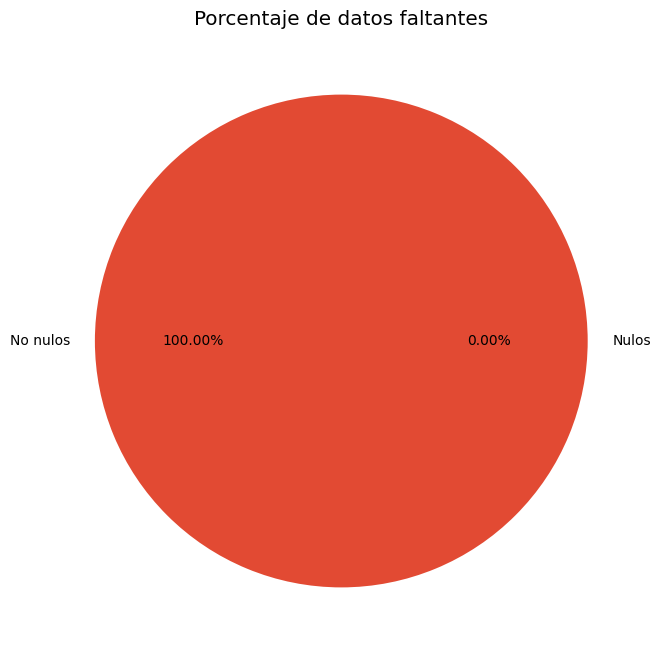

In [194]:
faltantes_total = df_faltantes['Faltantes'].sum()
registros_total = df.shape[0] * df.shape[1]

plt.figure(figsize=(8, 8))
datos = [registros_total - faltantes_total, faltantes_total]
label = ['No nulos', 'Nulos']

plt.pie(datos, labels=label, autopct='%.2f%%')
plt.title('Porcentaje de datos faltantes')
plt.show()

Para detectar atípicos en el conjunto de datos, se utilizó el algoritmo LOF (Local Outlier Factor) después de haber escalado las características para asegurarnos de que todas las variables tuvieran la misma importancia en el análisis. LOF se basa en la idea de que los puntos atípicos son aquellos que tienen una densidad local más baja que sus vecinos. El algoritmo asigna a cada punto un valor LOF, que es una medida de cuán diferente es la densidad local del punto en comparación con la densidad local de sus vecinos. Los puntos con un valor LOF alto son considerados como datos atípicos, mientras que los puntos con un valor LOF bajo son considerados como puntos normales.



In [195]:
n_errors / df_features.shape[0] * 100

20.382824624935335

In [196]:
(df_features.shape[0] - data_z.shape[0]) / df_features.shape[0] * 100

57.42369374030005

Con el método LOF se encontraron $4334$ registros atípicos, equivalentes al $20.4\%$ del total de datos. Además de eso, con el test Z se encontraron $12210$ registros atipicos que corresponden al $57\%$ del total de datos, quedando sólo con $9053$ registros. Debido a esto, se decide trabajar con el método LOF ya que nos permite tener un mayor número de datos para realizar los modelos de regresión.

Se utilizó una combinación de técnicas de reducción de dimensionalidad para reducir la complejidad del conjunto de datos y mejorar la eficiencia del análisis. En este caso, se aplicaron tres técnicas diferentes de reducción de dimensionalidad: PCA, Kernel PCA y Sparse PCA, y se obtuvieron diferentes números de características después de la reducción.

En particular, se obtuvieron 15 características después de aplicar tanto PCA como Kernel PCA, mientras que después de Sparse PCA se obtuvieron 50 características. Esto sugiere que Sparse PCA podría haber sido capaz de retener más información de las características originales en comparación con las otras técnicas.

Se debe tener en cuenta que para ejecutar kernel pca y sparse pca se tuvo que reducir el tamaño del dataset a sólo $5000$ muestras debido a las limitaciones en recursos computacionales.


Se realizaron tres modelos de regresión para predecir una variable objetivo y se evaluaron utilizando el coeficiente de determinación R2. El modelo de regresión lineal tuvo el mejor rendimiento, con un valor de $R2$ de $0.75$, lo que sugiere que puede ser un modelo adecuado para predecir la variable objetivo en cuestión.

El modelo de regresión lineal con pasos tuvo un valor de $R2$ de $0.63$, lo que indica que su rendimiento es moderado en comparación con el modelo de regresión lineal simple. Este modelo podría ser una opción a considerar si se desea una mayor interpretabilidad de las variables predictoras.

Por último, el modelo de regresión lineal con características polinómicas tuvo el peor rendimiento. Esto sugiere que agregar características polinómicas no mejoró significativamente la capacidad del modelo para predecir la variable objetivo.